In [1]:
import pandas as pd
import numpy as np
import math

## Loading the data

In [2]:
# Load in the train and test datasets
print('Loading data...')
data = pd.read_csv("training.csv")

data.info()

Loading data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
EventId                        250000 non-null int64
DER_mass_MMC                   250000 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           250000 non-null float64
DER_mass_jet_jet               250000 non-null float64
DER_prodeta_jet_jet            250000 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         250000 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null flo

In [3]:
data.head(8)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.245333,b
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,...,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.018636,s


## Data Preparation

In [4]:
# change names of output categories
print('Preparing data...')

# replace -999.000 by the mean for each column
data = data.replace(-999.0, np.nan)
data = data.fillna(data.mean())

data = data.replace(('s', 'b'), (1, 0))

data.head(8)

Preparing data...


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470000,51.655,97.827,27.980,0.910000,124.71100,2.666000,3.064,41.928,...,2,67.435000,2.150000,0.444000,46.062000,1.240000,-2.475000,113.497,0.002653,1
1,100001,160.937000,68.768,103.235,48.146,2.403735,371.78336,-0.821688,3.473,2.078,...,1,46.226000,0.725000,1.158000,57.679474,-0.011845,-0.001582,46.226,2.233584,0
2,100002,121.858528,162.172,125.953,35.635,2.403735,371.78336,-0.821688,3.148,9.336,...,1,44.251000,2.053000,-2.028000,57.679474,-0.011845,-0.001582,44.251,2.347389,0
3,100003,143.905000,81.417,80.943,0.414,2.403735,371.78336,-0.821688,3.310,0.414,...,0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,-0.000,5.446378,0
4,100004,175.864000,16.915,134.805,16.405,2.403735,371.78336,-0.821688,3.891,16.405,...,0,84.822105,-0.003275,-0.012393,57.679474,-0.011845,-0.001582,0.000,6.245333,0
5,100005,89.744000,13.550,59.149,116.344,2.636000,284.58400,-0.540000,1.362,61.619,...,3,90.547000,-2.412000,-0.653000,56.165000,0.224000,3.106000,193.660,0.083414,0
6,100006,148.754000,28.862,107.782,106.130,0.733000,158.35900,0.113000,2.941,2.545,...,2,123.010000,0.864000,1.450000,56.867000,0.131000,-2.767000,179.877,0.002653,1
7,100007,154.916000,10.418,94.714,29.169,2.403735,371.78336,-0.821688,2.897,1.526,...,1,30.638000,-0.715000,-1.724000,57.679474,-0.011845,-0.001582,30.638,0.018636,1


## Data Visualization

In [5]:
import seaborn as sns
%matplotlib inline

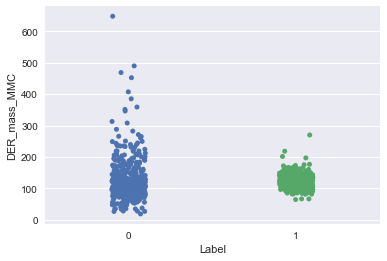

In [6]:
# create list of features
x_names = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 
         'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 
         'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta',
         'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet',
         'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
         'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

# A response variable
y_name = 'Label'

sns.stripplot(data=data.head(1000), x='Label', y='DER_mass_MMC', jitter=True)

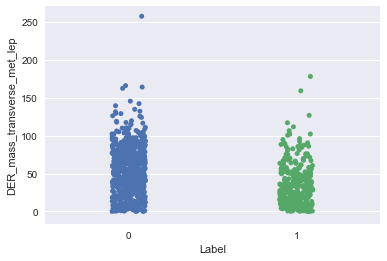

In [7]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_mass_transverse_met_lep', jitter=True)

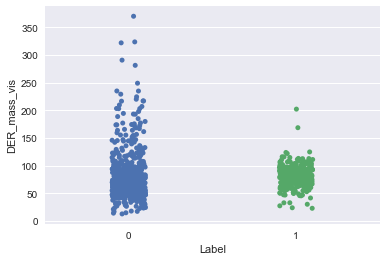

In [8]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_mass_vis', jitter=True)

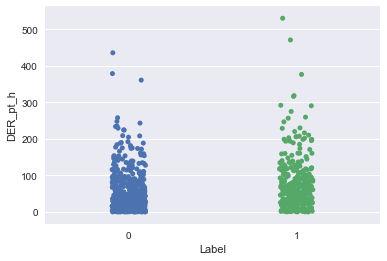

In [9]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_pt_h', jitter=True)

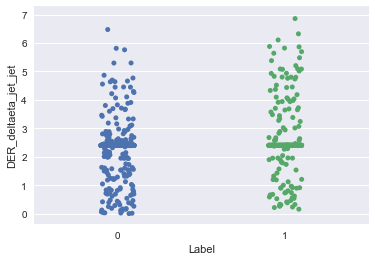

In [10]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_deltaeta_jet_jet', jitter=True)

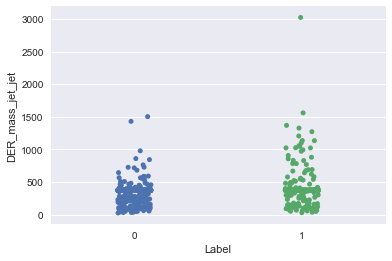

In [11]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_mass_jet_jet', jitter=True)

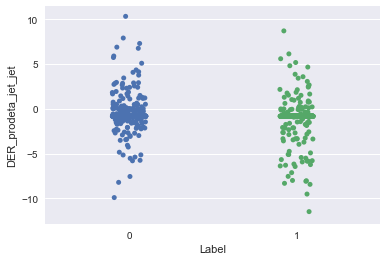

In [12]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_prodeta_jet_jet', jitter=True)

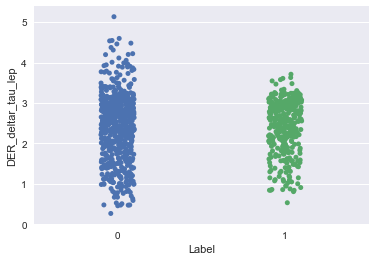

In [13]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_deltar_tau_lep', jitter=True)

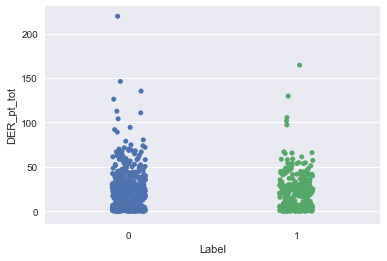

In [14]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_pt_tot', jitter=True)

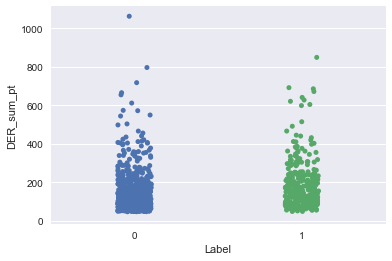

In [15]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_sum_pt', jitter=True)

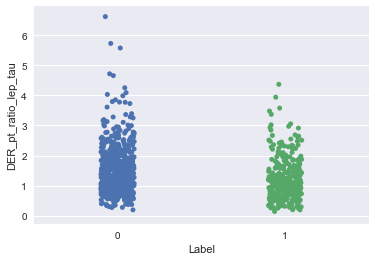

In [16]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_pt_ratio_lep_tau', jitter=True)

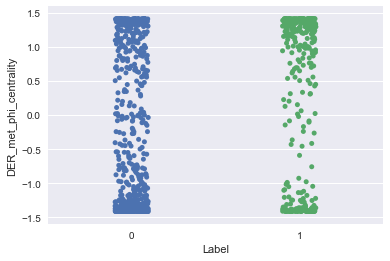

In [17]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_met_phi_centrality', jitter=True)

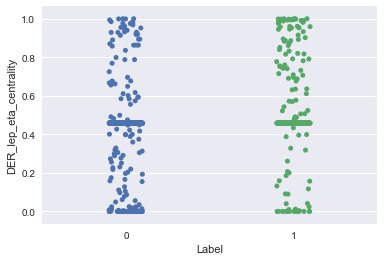

In [18]:
sns.stripplot(data=data.head(1000), x='Label', y='DER_lep_eta_centrality', jitter=True)

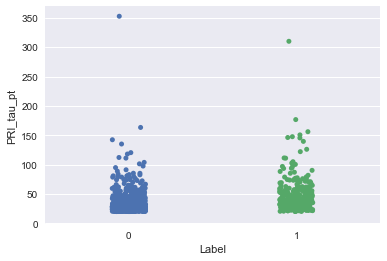

In [19]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_tau_pt', jitter=True)

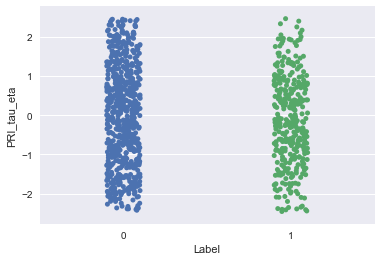

In [20]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_tau_eta', jitter=True)

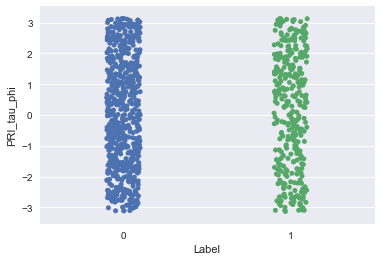

In [21]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_tau_phi', jitter=True)

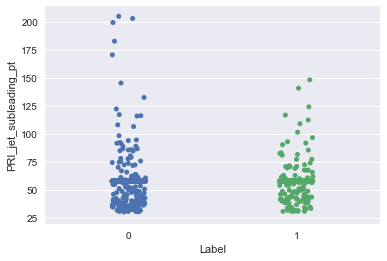

In [22]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_jet_subleading_pt', jitter=True)

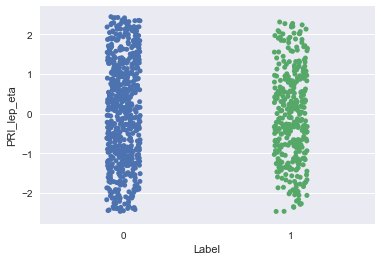

In [23]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_lep_eta', jitter=True)

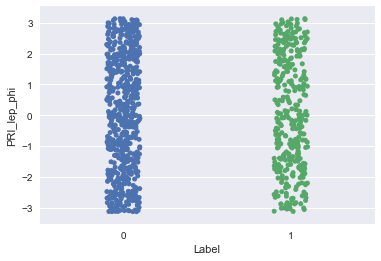

In [24]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_lep_phi', jitter=True)

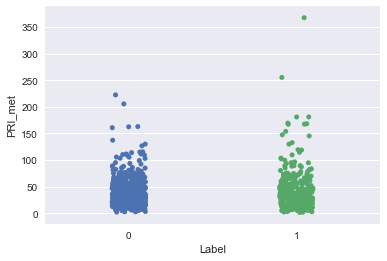

In [25]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_met', jitter=True)

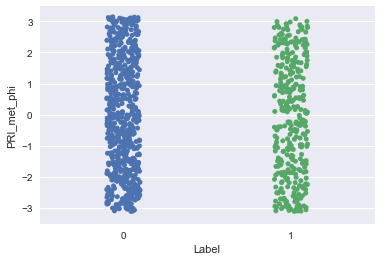

In [26]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_met_phi', jitter=True)

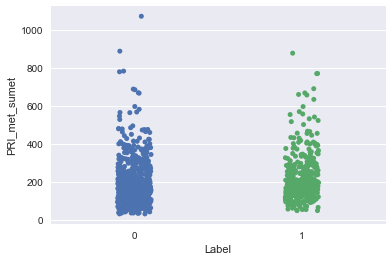

In [27]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_met_sumet', jitter=True)

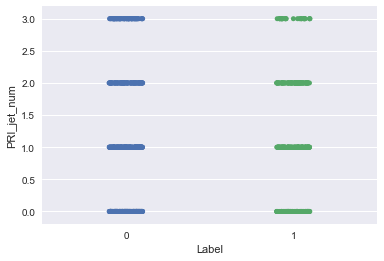

In [28]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_jet_num', jitter=True)

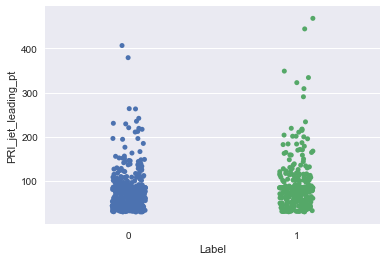

In [29]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_jet_leading_pt', jitter=True)

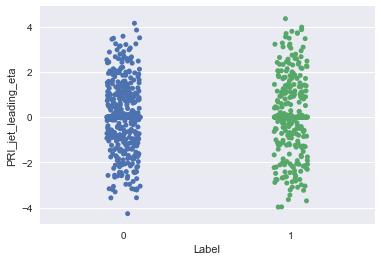

In [30]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_jet_leading_eta', jitter=True)

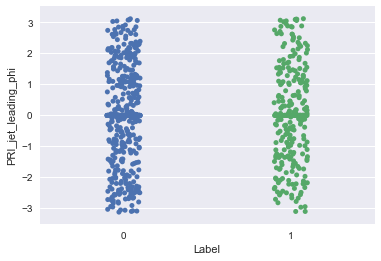

In [31]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_jet_leading_phi', jitter=True)

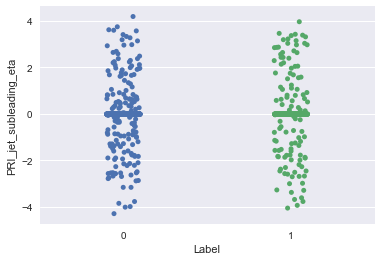

In [32]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_jet_subleading_eta', jitter=True)

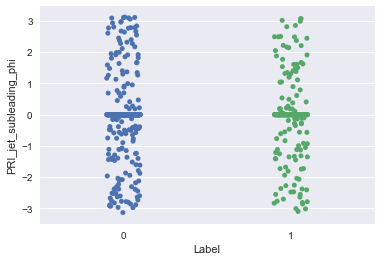

In [33]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_jet_subleading_phi', jitter=True)

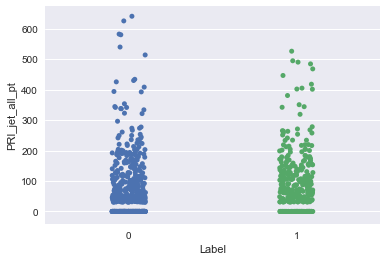

In [34]:
sns.stripplot(data=data.head(1000), x='Label', y='PRI_jet_all_pt', jitter=True)

## Throw away certain features

In [35]:
x_names_reduced = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 
         'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 
         'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta',
         'PRI_lep_pt', 'PRI_lep_eta', 'PRI_met', 'PRI_met_sumet',
         'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_subleading_pt',
         'PRI_jet_subleading_eta', 'PRI_jet_all_pt']

## Split dataset into Train and Test

In [36]:
print('Splitting data into train and test parts...')

data_np = np.array(data)

# Pick a random seed for reproducible results. Choose wisely!
np.random.seed(41)
# Random number for training/validation splitting
r = np.random.rand(data.shape[0])

# First 80% are training
Y_train = data_np[:,-1][r<0.8]
X_train = data_np[:,1:-2][r<0.8]
X_train_reduced = np.array(data[x_names_reduced])[r<0.8]
W_train = data_np[:,-2][r<0.8]
# Lirst 20% are validation
Y_valid = data_np[:,-1][r>=0.8]
X_valid = data_np[:,1:-2][r>=0.8]
X_valid_reduced = np.array(data[x_names_reduced])[r>=0.8]
W_valid = data_np[:,-2][r>=0.8]

Splitting data into train and test parts...


## Functions for calculating AMS

In [37]:
def AMSScore(s,b): 
    return  math.sqrt (2.*( (s + b + 10.)*math.log(1.+s/(b+10.))-s))

In [38]:
def output(method, X_train_=X_train, X_valid_=X_valid):
    # Get the probaility output from the trained method, using the 20% for testing
    prob_predict_train = method.predict_proba(X_train_)[:,1]
    prob_predict_valid = method.predict_proba(X_valid_)[:,1]
    
    # Experience shows me that choosing the top 15% as signal gives a good AMS score.
    # This can be optimized though!
    pcut = np.percentile(prob_predict_train,85)
    
    # This are the final signal and background predictions
    Yhat_train = prob_predict_train > pcut 
    Yhat_valid = prob_predict_valid > pcut
    
    # To calculate the AMS data, first get the true positives and true negatives
    # Scale the weights according to the r cutoff.
    TruePositive_train = W_train*(Y_train==1.0)*(1.0/0.8)
    TrueNegative_train = W_train*(Y_train==0.0)*(1.0/0.8)
    TruePositive_valid = W_valid*(Y_valid==1.0)*(1.0/0.2)
    TrueNegative_valid = W_valid*(Y_valid==0.0)*(1.0/0.2)
 
    # s and b for the training 
    s_train = sum ( TruePositive_train*(Yhat_train==1.0) )
    b_train = sum ( TrueNegative_train*(Yhat_train==1.0) )
    s_valid = sum ( TruePositive_valid*(Yhat_valid==1.0) )
    b_valid = sum ( TrueNegative_valid*(Yhat_valid==1.0) )
    
    # Now calculate the AMS scores
    print('Calculating AMS score for a probability cutoff pcut=',pcut)
    
    print('  - AMS based on 80% training   sample:',AMSScore(s_train,b_train))
    print('  - AMS based on 20% validation sample:',AMSScore(s_valid,b_valid))

# Training our models

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RFC, AdaBoostClassifier as ABC, GradientBoostingClassifier as GBC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score

In [40]:
"""
names = ["Nearest Neighbors(5)", "Nearest Neighbors(10)", "Nearest Neighbors(20)", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "AdaBoost", "GradientBoosting", "Neural Net", "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(5),
    KNeighborsClassifier(10),
    KNeighborsClassifier(20),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RFC(max_depth=5, n_estimators=30, max_features=1),
    ABC(),
    GBC(n_estimators=50, max_depth=6, min_samples_leaf=200, max_features=12, verbose=1),
    MLPClassifier(alpha=1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]
"""
names = ["Nearest Neighbors(K=10)", "Nearest Neighbors(K=20)", "Decision Tree", "Random Forest", "AdaBoost", 
         "GradientBoosting_1", "GradientBoosting_2","Neural Net", "Naive Bayes", "QDA"]

classifiers = [KNeighborsClassifier(n_neighbors=10),
    KNeighborsClassifier(n_neighbors=20),
    DecisionTreeClassifier(max_depth=6),
    RFC(max_depth=6, n_estimators=50, max_features=12, verbose=1),
    ABC(),
    GBC(n_estimators=60, max_depth=5, min_samples_leaf=300, max_features=10, verbose=1),
    GBC(n_estimators=50, max_depth=6, min_samples_leaf=200, max_features=12, verbose=1),
    MLPClassifier(alpha=1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [41]:
class_dict = dict(zip(names, classifiers))

In [42]:
# Using all our features
for key, value in class_dict.items():
    print('\nMethod =', key)
    value.fit(X_train, Y_train)
    y_pred = value.predict(X_valid)
    print("Accuracy =", accuracy_score(Y_valid, y_pred))
    output(value, X_train, X_valid)
    print('___________________________________________________________________')


Method = Nearest Neighbors(K=10)
Accuracy = 0.805408122236
Calculating AMS score for a probability cutoff pcut= 0.8
  - AMS based on 80% training   sample: 4.346810221526987
  - AMS based on 20% validation sample: 2.5751449764706527
___________________________________________________________________

Method = Nearest Neighbors(K=20)
Accuracy = 0.81025331725
Calculating AMS score for a probability cutoff pcut= 0.8
  - AMS based on 80% training   sample: 3.517667271916688
  - AMS based on 20% validation sample: 2.739738106441019
___________________________________________________________________

Method = Decision Tree
Accuracy = 0.810615199035
Calculating AMS score for a probability cutoff pcut= 0.855241264559
  - AMS based on 80% training   sample: 2.649559619198614
  - AMS based on 20% validation sample: 2.6884205465996915
___________________________________________________________________

Method = Random Forest


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished


Accuracy = 0.820747889023


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


Calculating AMS score for a probability cutoff pcut= 0.732088668275
  - AMS based on 80% training   sample: 2.952231116693024
  - AMS based on 20% validation sample: 3.0926310334925744
___________________________________________________________________

Method = AdaBoost
Accuracy = 0.812866907921
Calculating AMS score for a probability cutoff pcut= 0.506102551748
  - AMS based on 80% training   sample: 2.6392236085350946
  - AMS based on 20% validation sample: 2.592467240642746
___________________________________________________________________

Method = GradientBoosting_1
      Iter       Train Loss   Remaining Time 
         1           1.2252            1.96m
         2           1.1825            1.89m
         3           1.1324            1.91m
         4           1.0912            1.81m
         5           1.0558            1.76m
         6           1.0217            1.72m
         7           0.9928            1.70m
         8           0.9710            1.67m
         9    

In [43]:
# Using only best features
for key, value in class_dict.items():
    print('\nMethod =', key)
    value.fit(X_train_reduced, Y_train)
    y_pred = value.predict(X_valid_reduced)
    print("Accuracy =", accuracy_score(Y_valid, y_pred))
    output(value, X_train_reduced, X_valid_reduced)
    print('___________________________________________________________________')


Method = Nearest Neighbors(K=10)
Accuracy = 0.805790108565
Calculating AMS score for a probability cutoff pcut= 0.8
  - AMS based on 80% training   sample: 4.257580283014311
  - AMS based on 20% validation sample: 2.5794215853589506
___________________________________________________________________

Method = Nearest Neighbors(K=20)
Accuracy = 0.809991958183
Calculating AMS score for a probability cutoff pcut= 0.8
  - AMS based on 80% training   sample: 3.4937724191828785
  - AMS based on 20% validation sample: 2.7018881473274576
___________________________________________________________________

Method = Decision Tree
Accuracy = 0.810635303579
Calculating AMS score for a probability cutoff pcut= 0.855241264559
  - AMS based on 80% training   sample: 2.6495393327747983
  - AMS based on 20% validation sample: 2.6902638457607084
___________________________________________________________________

Method = Random Forest


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


Accuracy = 0.818636911942


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


Calculating AMS score for a probability cutoff pcut= 0.751970168975
  - AMS based on 80% training   sample: 2.9137103177631016
  - AMS based on 20% validation sample: 3.0027620073492782
___________________________________________________________________

Method = AdaBoost
Accuracy = 0.812866907921
Calculating AMS score for a probability cutoff pcut= 0.506102551748
  - AMS based on 80% training   sample: 2.6392236085350946
  - AMS based on 20% validation sample: 2.592467240642746
___________________________________________________________________

Method = GradientBoosting_1
      Iter       Train Loss   Remaining Time 
         1           1.2190            1.85m
         2           1.1600            1.93m
         3           1.1126            1.94m
         4           1.0707            1.86m
         5           1.0369            1.81m
         6           1.0090            1.81m
         7           0.9811            1.75m
         8           0.9578            1.71m
         9   

# CHAMPION - Gradient Boosting Classifier  (not all features used)
## Accuracy = 0.836228387616
## AMS = 3.572923926428042